In [64]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from PIL import Image
from scipy.integrate import odeint
import math

# 1. SIR model

The model may be translated into the following set of differential equations:

$\frac{dS(t)}{dt} = - \beta SI$

$\frac{dI(t)}{dt} = \beta SI - rI$

$\frac{dR(t)}{dt} = rI$

In [14]:
def derivative(X, t):
    """
    Calculate derivatives of the model.
    
    def derivative(X: list, t: float) -> np.array
        
    Parameters
    ----------
    X : list
        Value of S, I and R in which we calculate derivatives
    t : float
        Time in which we calculate derivatives
    """
    S, I, R = X
    dS = - beta * S * I
    dI = beta * S * I - r * I
    dR = r * I
    return np.array([dS, dI, dR])

In [15]:
def sir(beta, r, X0, n):
    """
    Simulate SIR model.
    
    def sir(beta: float, r: float, X0: list, n: int) -> np.array
        
    Parameters
    ----------
    beta : float
        Parameter for infectivity
    r : float
        Parameter for recovery
    X0 : list
        Initial conditions
    n : int
        Number of days
    """
    return odeint(derivative, X0, t)

In [27]:
def calc_R_0(beta, r, N):
    """
    Calculate basic reproductive ratio R_0
    
    def calc_R_0(beta: float, r: float, N: int) -> float
        
    Parameters
    ----------
    beta : float
        Parameter for infectivity
    r : float
        Parameter for recovery
    X0 : list
        Initial conditions
    N : int
        Number of people in the model
    """
    return beta * N / r

##  Fix N, and vary β and r.  Basic reproductive ratio $R_0$

Initialize parameters, initial conditions and different value for $\beta$ and $r$.

In [84]:
N = 1000
I0 = 1
R0 = 0
S0 = N - I0 - R0
X0 = [S0, I0, R0]
n = 150
all_beta = [0.1/N, 0.3/N, 0.5/N, 0.7/N, 1/N, 1.3/N, 1.5/N, 1.7/N, 2/N]
all_r = [0.1, 0.3, 0.5, 0.7, 1]

Generate SIR model for different combinations of $\beta$ and $r$.

In [87]:
all_sir = []
all_S = []
all_I = []
all_R = []
all_R_0 = []
for beta in all_beta:
    for r in all_r:
        sir1 = sir(beta, r, X0, n)
        all_sir.append(sir1)
        all_S.append(sir1[:,0])
        all_I.append(sir1[:,1])
        all_R.append(sir1[:,2])
        all_R_0.append(calc_R_0(beta, r, N))

Sorted all results by $R_0$ in order to compare plots. Draw plots of the time evolution of each compartment for all simulations. 

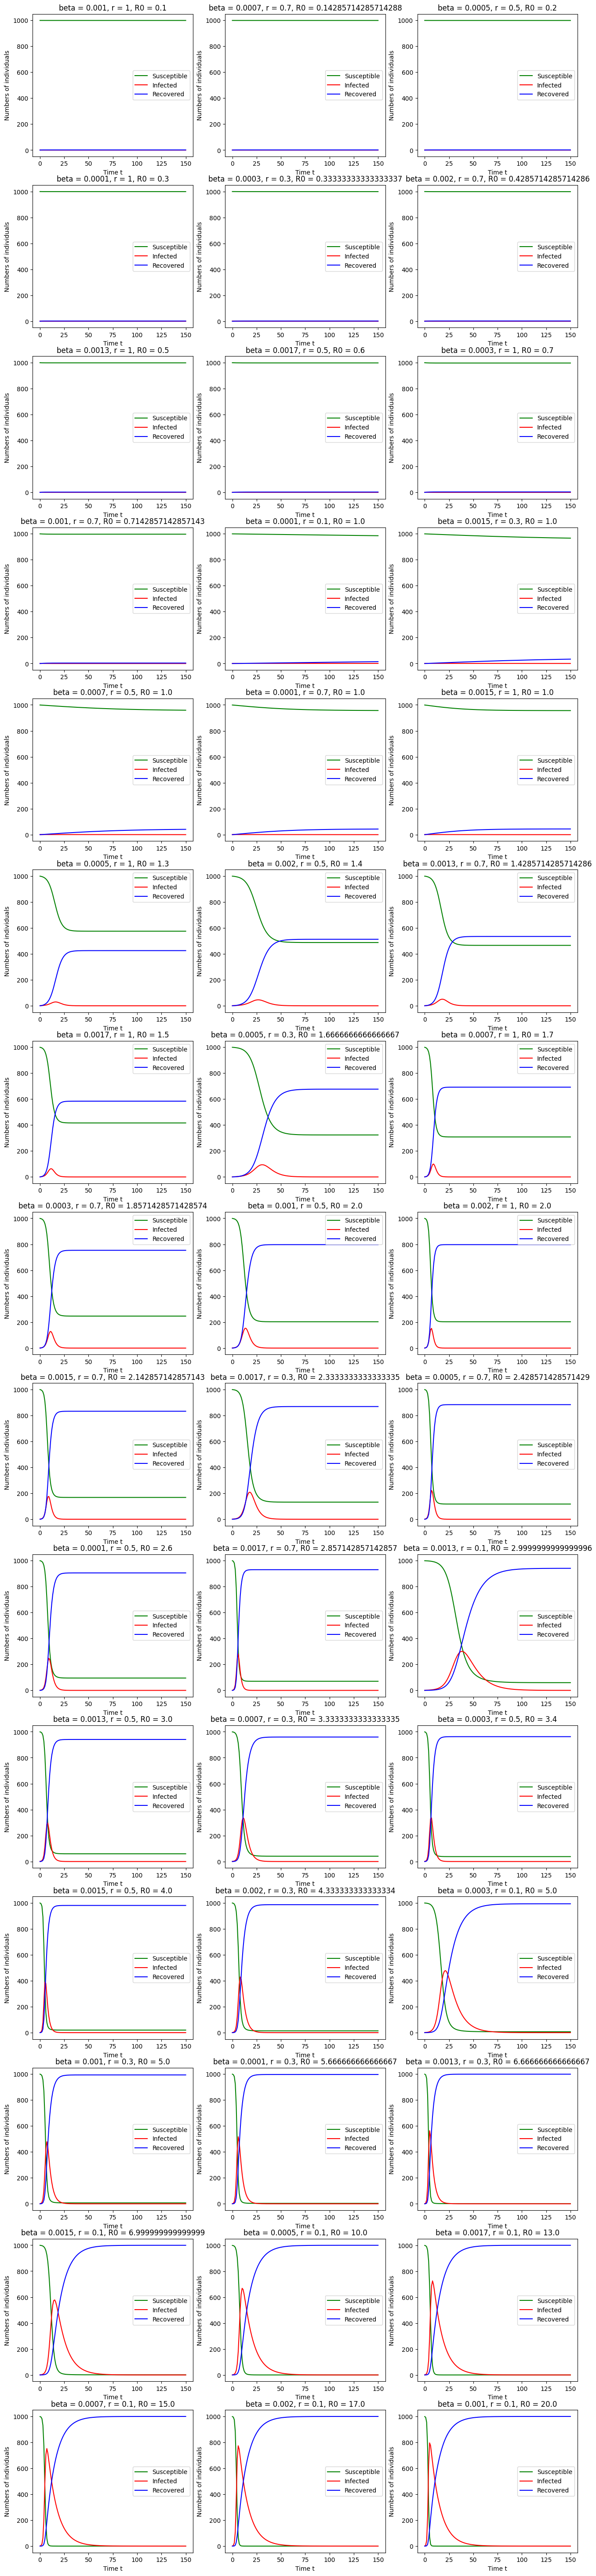

In [97]:
numb = len(all_sir)
t = np.linspace(start = 0, stop = n, num = n)

sir_tuples = []
for i in range(numb):
    sir_tuples.append((all_S[i], all_I[i], all_R[i], all_beta[i%len(all_beta)], all_r[i%len(all_r)], all_R_0[i]))
sir_tuples = sorted(sir_tuples, key = lambda sir1: sir1[-1])
    
fig, axes = plt.subplots(math.ceil(numb/3), 3, figsize = (16, 5*math.ceil(numb/3)))

for i in range(numb):
    sir1 = sir_tuples[i]
    axes[i//3][i%3].plot(t, sir1[0], 'g', label = 'Susceptible')
    axes[i//3][i%3].plot(t, sir1[1], 'r', label = 'Infected')
    axes[i//3][i%3].plot(t, sir1[2], 'b', label = 'Recovered')
    axes[i//3][i%3].legend()
    axes[i//3][i%3].set(xlabel = 'Time t', ylabel = 'Numbers of individuals')
    axes[i//3][i%3].set_title(f"beta = {sir1[3]}, r = {sir1[4]}, R0 = {sir1[5]}")
plt.show()

We can see that when $R_0 \leqslant 1$ we do not have any peaks for plot for infected individuals, just straight line, and when $R_0 > 1$ there is a tendency: the more $R_0$, the higher peak we have. 

Also for the same $R_0$: the more $\beta$ and $r$, the faster model run.

There is an epidemic when $R_0 > 1$ and there is no epidemic otherwise.

## Phase portraits

The basic SIR model can be reduced to a two-dimensional system:

$\frac{dS(t)}{dt} = - \beta SI$

$\frac{dI(t)}{dt} = \beta SI - rI$

In [ ]:
def f(X, t):
    """
    Calculate derivatives of the model.
    
    def derivative(X: list, t: float) -> np.array
        
    Parameters
    ----------
    X : list
        Value of S, I and R in which we calculate derivatives
    t : float
        Time in which we calculate derivatives
    """
    S, I = X
    dS = - beta * S * I
    dI = beta * S * I - r * I
    return np.array([dS, dI])

Plot a phase portrait for $N = 1000$ (Number of individuals), $\beta = 0.0015$ (Parameter for infectivity), $r = 0.1$ (Parameter for recovery) for S and I between $0$ and $N$ with step $20$. 

Also plot several trajectories for initial values: 
- $S_0 = 600, \; I_0 = 600$
- $S_0 = 900, \; I_0 = 100$
- $S_0 = 300, \; I_0 = 900$

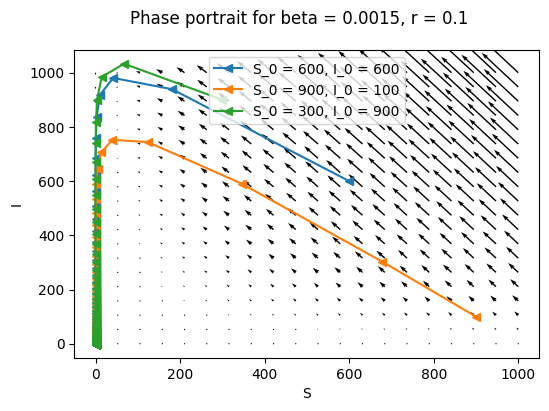

In [156]:
N = 1000
beta = 1.5 / N
r = 0.1

min = 0
max = N
step = 20
S, I  = np.meshgrid(np.linspace(min, max, step), np.linspace(min, max, step))

dS = - beta * S * I
dI = beta * S * I - r * I

fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle(f"Phase portrait for beta = {beta}, r = {r}")
ax.set(xlabel = 'S', ylabel = 'I')
plt.quiver(S, I, dS, dI)

dt = 1000
t = np.linspace(min, max, dt)
X0 = [[600, 600], [900, 100], [300, 900]]
X = []
for i in range(len(X0)):
    x = odeint(dif, X0[i], t)
    X.append(x)
    plt.plot(x[:,0], x[:,1], '<-', label = f"S_0 = {X0[i][0]}, I_0 = {X0[i][1]}")
plt.legend()
plt.show()

We can see that all trajectories coincide at the point (0, 0).

## The total number of individuals infected during an epidemic

I used values that were generated earlier (all_beta, all_r, all_S, all_R_0).

Total number of individuals infected during an epidemic is just total number of individuals minus susceptible individuals in the last step.

In [175]:
numb_inf = []
for i in range(len(all_R_0)):
    numb_inf.append(N - all_S[i][-1])

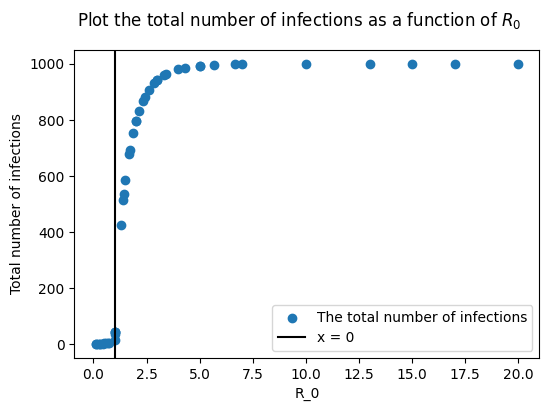

In [189]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle(r"Plot the total number of infections as a function of $R_0$")
ax.scatter(all_R_0, numb_inf, label = 'The total number of infections')
ax.set(xlabel = r'R_0', ylabel = 'Total number of infections')
plt.axvline(x = 1, color = 'black', label = 'x = 0')
plt.legend()
plt.show()

For $R_0 < 1$ values are close to 0. For $R_0 > 1$ values increase. 

# 2. SIR model on a network

Algorithm: 

1. Initialize all nodes as susceptible.
2. Select a single node at random to begin the infection.
3. While there are any infected nodes, do:

    — For each infected node u in the previous step:
    
        * For each susceptible neighbor v of u with probability p set it to infected on the next step,
    — Set u to recovered on the next step.

Return list with data on each step:
- Number of susceptible individuals 
- Number of infected individuals
- Number of removed individuals
- List of nodes with states if we need

In [224]:
def sir_netw(G, p, origin = None, with_nodes = False):
    """
    Simulate SIR model on a network.
    
    def sir_netw(G: nx.Graph, p: float, origin: str, with_nodes: bool) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    origin: str
        The first node (default is None)
    with_nodes: bool
        Flag tat show if we need list of nodes (default is False)
    """
    N = len(G)
    infected = []
    
    # initialize nodes
    for node in G.nodes():
        G.nodes[node]["state"] = "S" # all healthy at the beginning

    #inject the 'zero' patient randomly if we do not have given one
    if origin == None:
        node = random.choice(list(G.nodes))
        G.nodes[node]["state"] = "I"
        infected = [node]
    else:
        G.nodes[origin]["state"] = "I"
        infected = [origin]
    
    if with_nodes:
        results = [[N - 1, 1, 0, G.copy().nodes]]
    else:
        results = [[N - 1, 1, 0]]
    
    #time loop while number of infected is not equal 0
    while results[-1][1] != 0:
        new_infected = []
        ns = results[-1][0]
        ni = results[-1][1]
        nr = results[-1][2]
        
        for node in infected:
            for neigh in G.neighbors(node):
                if G.nodes[neigh]["state"] == "S":
                    q = random.random()
                    if q < p:
                        G.nodes[neigh]["state"] = "I"
                        new_infected.append(neigh)
                        ns -= 1
                        ni += 1
            G.nodes[node]["state"] = "R"
            ni -= 1
            nr += 1
        if with_nodes:
            results.append([ns, ni, nr, G.copy().nodes])
        else:
            results.append([ns, ni, nr])
        infected = new_infected
    return results

## a. Simulate the model on graph with 100 nodes

Chose probability $p = 0.3$. 

Simulated  the model on a 2D lattice, a random graph, a Watts-Strogatz graph and a Barabasi-Albert graph. Print the number of susceptible, infected and removed in the last step. 

In [191]:
q = 0.3

### 2D lattice graph

In [192]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

result_2d_lat = sir_netw(G_2d_lat, q)
last_res = result_2d_lat[-1]
print(f"Number of susceptible: {last_res[0]}, infected: {last_res[1]}, removed: {last_res[2]}")

Number of susceptible: 94, infected: 0, removed: 6


### Random graph

In [193]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

result_rand = sir_netw(G_rand, q)
last_res = result_rand[-1]
print(f"Number of susceptible: {last_res[0]}, infected: {last_res[1]}, removed: {last_res[2]}")

Number of susceptible: 0, infected: 0, removed: 100


### Watts–Strogatz graph

In [194]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

result_ws = sir_netw(G_ws, q)
last_res = result_ws[-1]
print(f"Number of susceptible: {last_res[0]}, infected: {last_res[1]}, removed: {last_res[2]}")

Number of susceptible: 97, infected: 0, removed: 3


### Barabási–Albert graph

In [195]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

q = 0.3
result_ba = sir_netw(G_ba, q)
last_res = result_ba[-1]
print(f"Number of susceptible: {last_res[0]}, infected: {last_res[1]}, removed: {last_res[2]}")

Number of susceptible: 21, infected: 0, removed: 79


## b. The fraction of infected nodes

Record the fraction of infected nodes in the network at each time point for three different values of $p$. Plot the average of this runs over time for each value of $p$.

I also plot the number of susceptible and removed individuals. 

The lengths of simulations are different, so I supplement them with the last values to the desired length.

In [197]:
def fraction_time(G, p, N):
    """
    Calculate the fraction of different types nodes in the network at each time point
    
    def fraction_time(G: nx.Graph, p: float, N: int) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    N: int
        The number of Monte Carlo simulations 
    """
    all_average = []
    origin = random.choice(list(G.nodes))
    for q in p:
        average = list(np.divide(sir_netw(G, q, origin), len(G.nodes)))
        for i in range(N - 1):
            result = sir_netw(G, q, origin)
            n1 = len(average)
            n2 = len(result)
            if n1 < n2:
                for j in range(n2 - n1):
                    average.append(average[-1])
            elif n1 > n2:
                for j in range(n1 - n2):
                    result.append(result[-1])
            result = list(np.divide(result, len(G.nodes)))
            average = list(np.add(average, result))
        average = np.divide(average, N)
        all_average.append(average)
    return all_average

In [198]:
def plot_frac(all_average, p):
    """
    Plot the fraction of different types nodes in the network at each time point for three different p.
    
    def plot_frac(all_average: list, p: float)
        
    Parameters
    ----------
    all_average: list
        The fraction of infected nodes in the network at each time point
    p: float
        The probabilities of contagion
    """
    n = len(p)
    
    fig, axes = plt.subplots(1, n, figsize = (5*n, 5))
    fig.suptitle("Plot of the average of the fraction of infected nodes")
    
    for i, q in enumerate(p):
        av = np.array(all_average[i])
        t = np.arange(len(av))
        axes[i].plot(t, av[:, 0], label = "Susceptible", color = "g")
        axes[i].plot(t, av[:, 1], label = "Infected", color = "r")
        axes[i].plot(t, av[:, 2], label = "Removed", color = "b")
        axes[i].legend()
        axes[i].set(xlabel = 'Time', ylabel = 'Fraction of nodes')
        axes[i].set_title(f"p = {q}")
    plt.show()

In [199]:
q = [0.3, 0.5, 0.7]
N = 1000

### 2D lattice graph

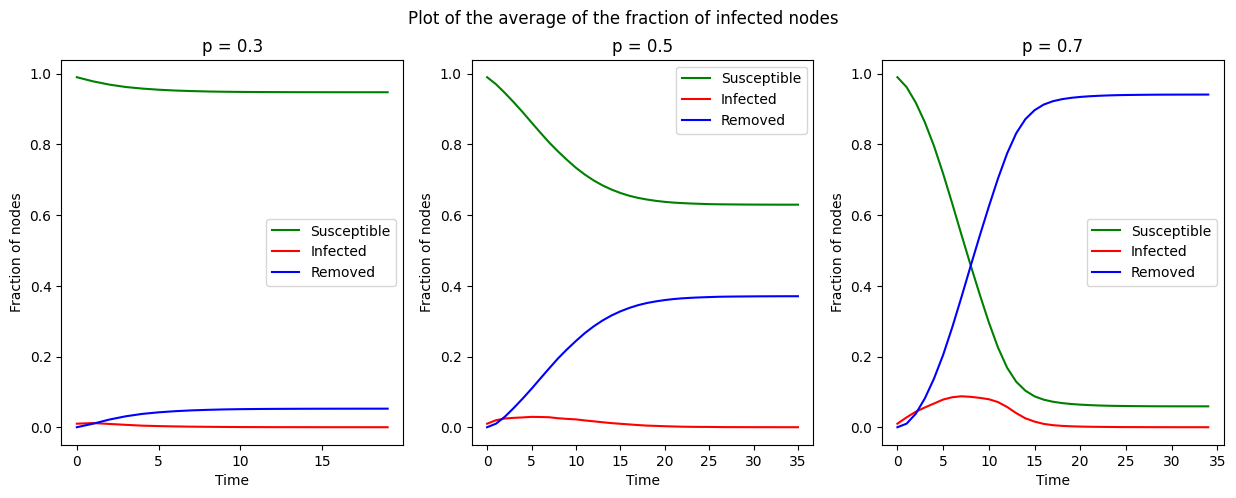

In [200]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

frac_time = fraction_time(G_2d_lat, q, N)
plot_frac(frac_time, q)

There is an epidemic only in the last case. 

### Random graph

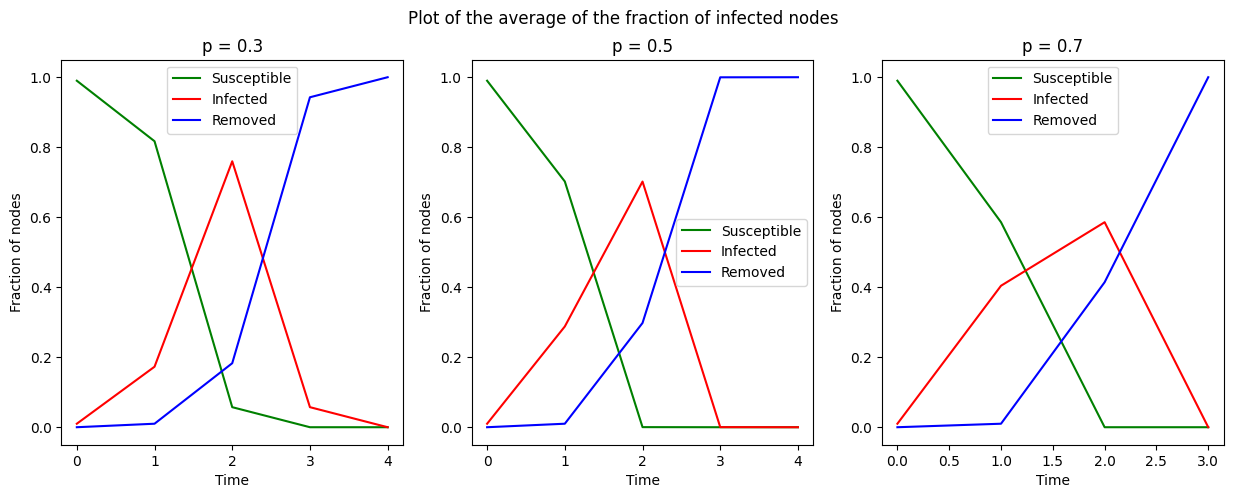

In [201]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

frac_time = fraction_time(G_rand, q, N)
plot_frac(frac_time, q)

There is an epidemic in all cases.  

### Watts–Strogatz graph

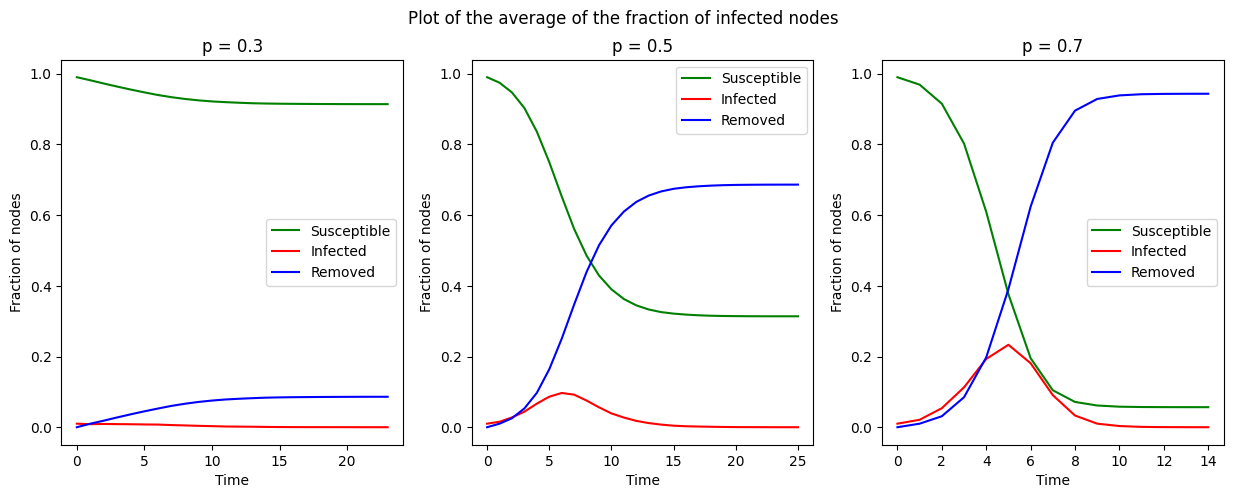

In [202]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

frac_time = fraction_time(G_ws, q, N)
plot_frac(frac_time, q)

There is an epidemic in the last two cases. 

### Barabási–Albert graph

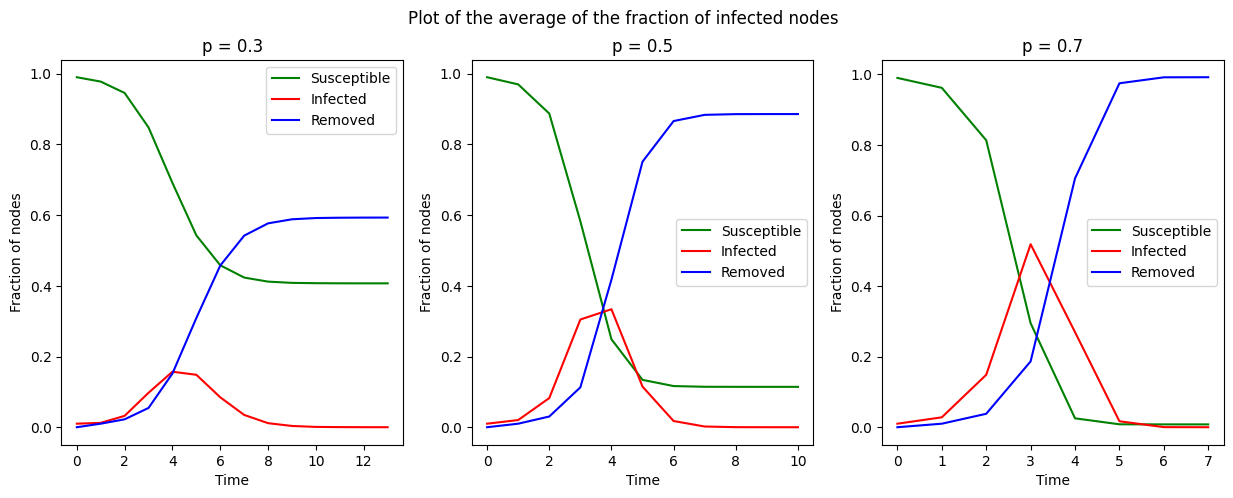

In [203]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

frac_time = fraction_time(G_ba, q, N)
plot_frac(frac_time, q)

There is an epidemic only in all cases. 

The worst situation for 2D lattice graph. The most fast simulation for random graph. 

## c. Compare with ODE model

The situation is very similar. In some case for small $p$ it behaves as in the ODE model with $R_0 < 1$. For big $p$ it behaves as in the ODE model with $R_0 > 1$. 

The infection curves for SIR model on a network mostly depend on the value of $p$ (but also depend on graph), while in the ODE model it mostly depends on $R_0$. 

## d, e. Simulation with 20 different value of p. Conclusion

Now select at least 20 different values of p. Simulate the SIR dynamics on the network starting with a random node. Measure the total propotion of the network that becomes infected, the time to clear infection and the time to the largest number of infected nodes. For each measure plot it as a function of p. Make one plot for each measure, including a separate line (labeled appropriately) for each network.

In [228]:
numb = 25
step = 1 / (numb - 1)
p_min = 0
p_max = 1 + step/10
q = np.arange(p_min, p_max, step)

N = 500

### The total propotion of the network that becomes infected

In [239]:
def total_prop_inf(G, p, N):
    """
    Calculate the total propotion of the network that becomes infected
    
    def total_prop_inf(G: nx.Graph, p: float, N: int) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    N: int
        The number of Monte Carlo simulations 
    """
    all_prop = []
    for q in p:
        prop = 0
        for i in range(N):
            res = sir_netw(G, q)
            infected = np.array(res)[:,1]
            prop += np.sum(infected) / len(G.nodes)
        prop /= N
        all_prop.append(prop)
    return all_prop

In [240]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

tpi_2d_lat = total_prop_inf(G_2d_lat, q, N)

In [241]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

tpi_rand = total_prop_inf(G_rand, q, N)

In [242]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

tpi_ws = total_prop_inf(G_ws, q, N)

In [243]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

tpi_ba = total_prop_inf(G_ba, q, N)

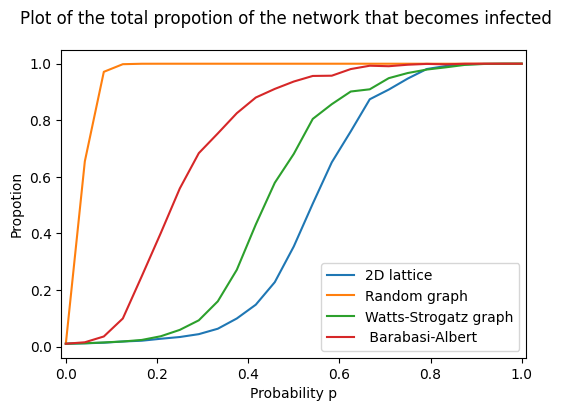

In [251]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle("Plot of the total propotion of the network that becomes infected")
ax.plot(q, tpi_2d_lat, label = "2D lattice")
ax.plot(q, tpi_rand, label = "Random graph")
ax.plot(q, tpi_ws, label = "Watts-Strogatz graph")
ax.plot(q, tpi_ba, label = " Barabasi-Albert")
ax.set(xlabel = 'Probability p', ylabel = 'Propotion')
ax.set_xlim(-0.01, 1.01)
plt.legend()
plt.show()

The fastest for random graph. The slowest for 2D lattice graph.

###  The time to clear infection

In [245]:
def time_clear(G, p, N):
    """
    Calculate the time to clear infection
    
    def time_clear(G: nx.Graph, p: float, N: int) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    N: int
        The number of Monte Carlo simulations 
    """
    all_time = []
    for q in p:
        time = 0
        for i in range(N):
            res = sir_netw(G, q)
            time += len(res)
        time /= N
        all_time.append(time)
    return all_time

In [246]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

tc_2d_lat = time_clear(G_2d_lat, q, N)

In [247]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

tc_rand = time_clear(G_rand, q, N)

In [248]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

tc_ws = time_clear(G_ws, q, N)

In [249]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

tc_ba = time_clear(G_ba, q, N)

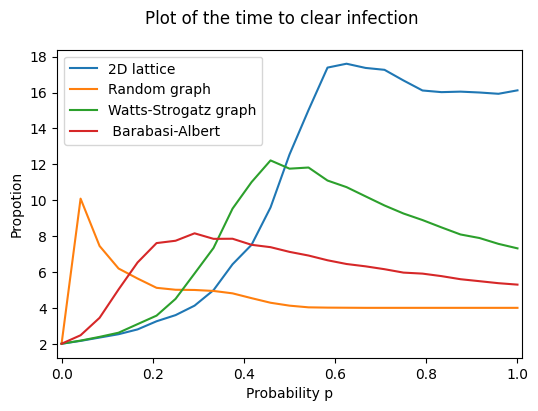

In [252]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle("Plot of the time to clear infection")
ax.plot(q, tc_2d_lat, label = "2D lattice")
ax.plot(q, tc_rand, label = "Random graph")
ax.plot(q, tc_ws, label = "Watts-Strogatz graph")
ax.plot(q, tc_ba, label = " Barabasi-Albert")
ax.set(xlabel = 'Probability p', ylabel = 'Propotion')
ax.set_xlim(-0.01, 1.01)
plt.legend()
plt.show()

The fastest for random graph. The slowest for 2D lattice graph.

### The time to the largest number of infected nodes

In [253]:
def time_largest(G, p, N):
    """
    Calculate the time to the largest number of infected nodes
    
    def time_clear(G: nx.Graph, p: float, N: int) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    N: int
        The number of Monte Carlo simulations 
    """
    all_time = []
    for q in p:
        time = 0
        for i in range(N):
            res = sir_netw(G, q)
            inf = np.array(res)[:,1]
            time += np.argmax(inf)
        time /= N
        all_time.append(time)
    return all_time

In [254]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

tl_2d_lat = time_largest(G_2d_lat, q, N)

In [255]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

tl_rand = time_largest(G_rand, q, N)

In [256]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

tl_ws = time_largest(G_ws, q, N)

In [257]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

tl_ba = time_largest(G_ba, q, N)

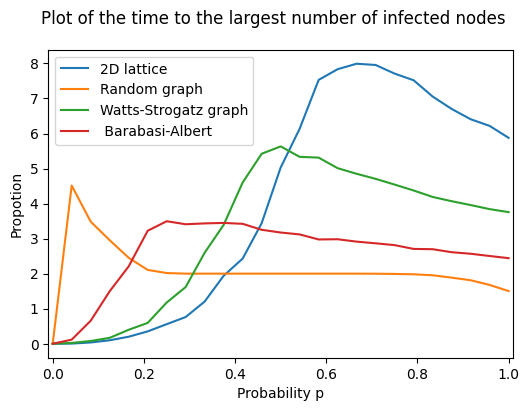

In [258]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle("Plot of the time to the largest number of infected nodes")
ax.plot(q, tl_2d_lat, label = "2D lattice")
ax.plot(q, tl_rand, label = "Random graph")
ax.plot(q, tl_ws, label = "Watts-Strogatz graph")
ax.plot(q, tl_ba, label = " Barabasi-Albert")
ax.set(xlabel = 'Probability p', ylabel = 'Propotion')
ax.set_xlim(-0.01, 1.01)
plt.legend()
plt.show()

The fastest for random graph. The slowest for 2D lattice graph.

All measures are the fastest for random graph and the slowest for 2D lattice graph.

## f. Visualizing a single run of the infection spreading

In [259]:
def create_gif(G, result, name):
    """
    Visualize a single run of the infection spreading in form of an animated gif
    
    def create_gif(G: nx.Graph, result: list, name: str)
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    result: list
        The result of simulation of SIR model
    name: str
        The name of the graph on which simulate SIR model
    """
    frames = []
    n = len(result)

    for i in range(n):
        color_map = []
        nodes = result[i][-1]
        for j in nodes:
            if nodes[j]["state"] == "S":
                color_map.append('green')
            elif nodes[j]["state"] == "I":
                color_map.append('red')
            else:
                color_map.append('blue')

        plt.figure(figsize = (8, 8))
        if name == "2d_lat":
            nx.draw_spectral(G, with_labels = True, node_color = color_map)
        else:
            nx.draw_kamada_kawai(G, with_labels = True, node_color = color_map)
        plt.savefig(f'{name}_{i}.png')
        frames.append(Image.open(f'{name}_{i}.png'))
        plt.close()

    frames.append(Image.open(f'{name}_{n-1}.png'))
    frames.append(Image.open(f'{name}_{n-1}.png'))

    frames[0].save(f"{name}.gif", format = "GIF", append_images = frames[1:], optimize = True, save_all = True, duration = n*90, loop = 0)


### 2D lattice graph

In [265]:
a = 5
b = 6
G_2d_lat = nx.grid_2d_graph(a, b)

q = 0.5
result_2d_lat = sir_netw(G_2d_lat, q, with_nodes = True)

create_gif(G_2d_lat, result_2d_lat, "2d_lat")

<img src="2d_lat.gif" width="500" align="center">

### Random graph

In [261]:
numb_nodes = 30
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

q = 0.3
result_rand = sir_netw(G_rand, q, with_nodes = True)

create_gif(G_rand, result_rand, "rand")

<img src="rand.gif" width="500" align="center">

### Watts–Strogatz graph

In [264]:
numb_nodes = 30
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

q = 0.3
result_ws = sir_netw(G_ws, q, with_nodes = True)

create_gif(G_ws, result_ws, "ws")

<img src="ws.gif" width="500" align="center">

### Barabási–Albert graph

In [263]:
numb_nodes = 30
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

q = 0.3
result_ba = sir_netw(G_ba, q, with_nodes = True)

create_gif(G_ba, result_ba, "ba")

<img src="ba.gif" width="500" align="center">

The worst on d 2D lattice graph, because its nodes have few neighbors. The best on d random graph, because its nodes have many neighbors.

# 3. SIR model on a network (continue)

Do as many times as the number of nodes:
1. Pick a node u at random. If the node is infected:

    – For each susceptible neighbor v of u with probability p set it to infected on the next step.
    
    – Set u to recovered on the next step

In [297]:
def sir_netw_new(G, p, origin = None, with_nodes = False):
    """
    Simulate SIR model on a network.
    
    def sir_netw_new(G: nx.Graph, p: float, origin: str, with_nodes: bool) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    origin: str
        The first node (default is None)
    with_nodes: bool
        Flag tat show if we need list of nodes (default is False)
    """
    
    N = len(G)
    
    # initialize nodes
    for node in G.nodes():
        G.nodes[node]["state"] = "S" # all healthy at the beginning

    #inject the 'zero' patient randomly if we do not have given one
    if origin == None:
        node = random.choice(list(G.nodes))
        G.nodes[node]["state"] = "I"
    else:
        G.nodes[origin]["state"] = "I"
    
    if with_nodes:
        results = [[N - 1, 1, 0, G.copy().nodes]]
    else:
        results = [[N - 1, 1, 0]]
    
    #time loop as many times as the number of nodes
    for i in range(N):
        ns = results[-1][0]
        ni = results[-1][1]
        nr = results[-1][2]
        
        node = random.choice(list(G.nodes))
        if G.nodes[node]["state"] == "I":
            for neigh in G.neighbors(node):
                if G.nodes[neigh]["state"] == "S":
                    q = random.random()
                    if q < p:
                        G.nodes[neigh]["state"] = "I"
                        ns -= 1
                        ni += 1
            G.nodes[node]["state"] = "R"
            ni -= 1
            nr += 1
        if with_nodes:
            results.append([ns, ni, nr, G.copy().nodes])
        else:
            results.append([ns, ni, nr])
    return results

## a. Simulate the model on graph with 100 nodes

Chose probability $p = 0.3$. 

Simulated  the model on a 2D lattice, a random graph, a Watts-Strogatz graph and a Barabasi-Albert graph. Print the number of susceptible, infected and removed in the last step. 

In [282]:
q = 0.3

### 2D lattice graph

In [283]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

result_2d_lat = sir_netw_new(G_2d_lat, q)
last_res = result_2d_lat[-1]
print(f"Number of susceptible: {last_res[0]}, infected: {last_res[1]}, removed: {last_res[2]}")

Number of susceptible: 99, infected: 1, removed: 0


### Random graph

In [284]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

result_rand = sir_netw_new(G_rand, q)
last_res = result_rand[-1]
print(f"Number of susceptible: {last_res[0]}, infected: {last_res[1]}, removed: {last_res[2]}")

Number of susceptible: 0, infected: 53, removed: 47


### Watts–Strogatz graph

In [285]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

result_ws = sir_netw_new(G_ws, q)
last_res = result_ws[-1]
print(f"Number of susceptible: {last_res[0]}, infected: {last_res[1]}, removed: {last_res[2]}")

Number of susceptible: 99, infected: 1, removed: 0


### Barabási–Albert graph

In [286]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

q = 0.3
result_ba = sir_netw_new(G_ba, q)
last_res = result_ba[-1]
print(f"Number of susceptible: {last_res[0]}, infected: {last_res[1]}, removed: {last_res[2]}")

Number of susceptible: 64, infected: 25, removed: 11


It is hard to choose infected node randomly, so it works slower. Additionally, we repeat as many times as the number of nodes, so in the end we also have infected nodes.  

## b. The fraction of infected nodes

Record the fraction of infected nodes in the network at each time point for three different values of $p$. Plot the average of this runs over time for each value of $p$.

I also plot the number of susceptible and removed individuals. 

In [287]:
def fraction_time_new(G, p, N):
    """
    Calculate the fraction of different types nodes in the network at each time point
    
    def fraction_time_new(G: nx.Graph, p: float, N: int) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    N: int
        The number of Monte Carlo simulations 
    """
    all_average = []
    origin = random.choice(list(G.nodes))
    for q in p:
        average = list(np.divide(sir_netw(G, q, origin), len(G.nodes)))
        for i in range(N - 1):
            result = sir_netw_new(G, q, origin)
            n1 = len(average)
            n2 = len(result)
            if n1 < n2:
                for j in range(n2 - n1):
                    average.append(average[-1])
            elif n1 > n2:
                for j in range(n1 - n2):
                    result.append(result[-1])
            result = list(np.divide(result, len(G.nodes)))
            average = list(np.add(average, result))
        average = np.divide(average, N)
        all_average.append(average)
    return all_average

In [290]:
q = [0.3, 0.5, 0.7]
N = 500

### 2D lattice graph

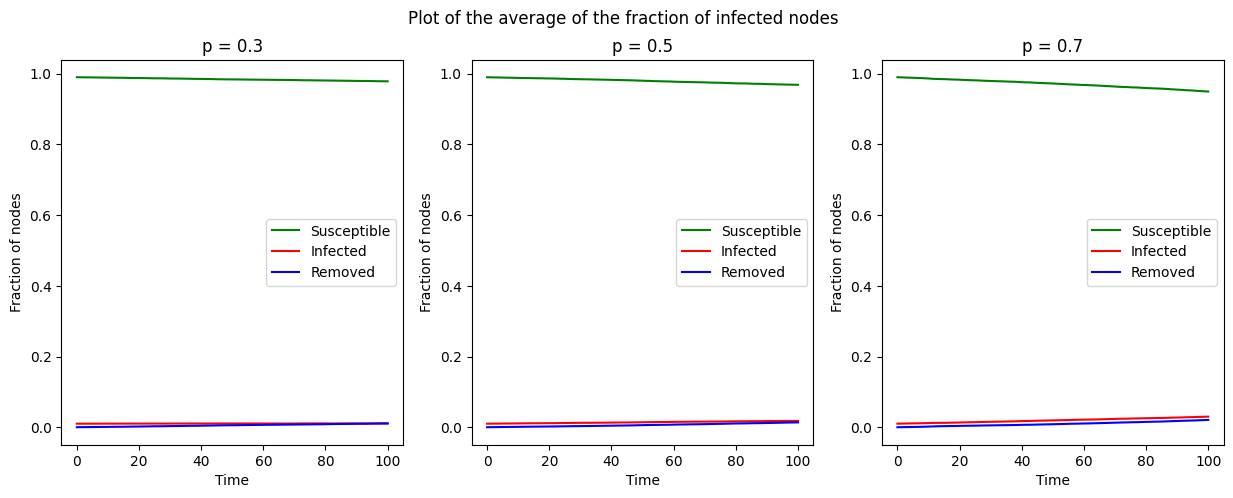

In [292]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

frac_time = fraction_time_new(G_2d_lat, q, N)
plot_frac(frac_time, q)

No epidemic starts. 

### Random graph

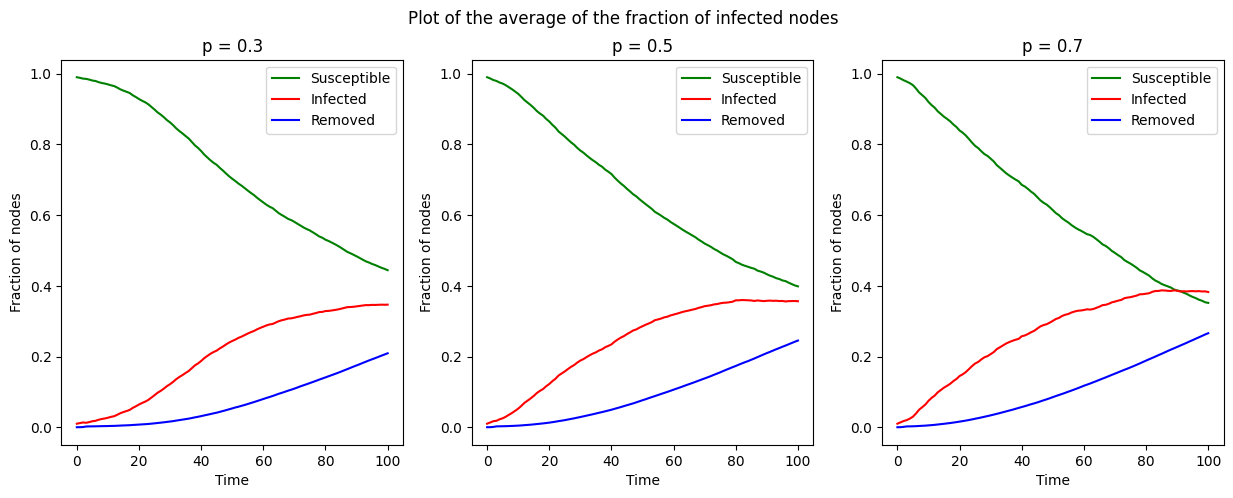

In [298]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

frac_time = fraction_time_new(G_rand, q, N)
plot_frac(frac_time, q)

Epidemics started, but did not finish.  

### Watts–Strogatz graph

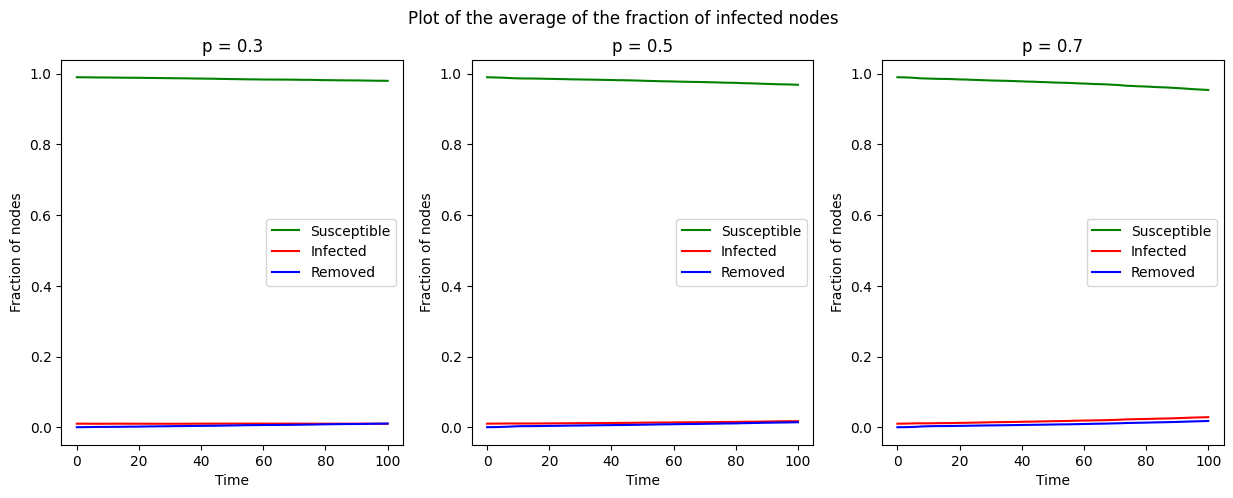

In [299]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

frac_time = fraction_time_new(G_ws, q, N)
plot_frac(frac_time, q)

No epidemic started. 

### Barabási–Albert graph

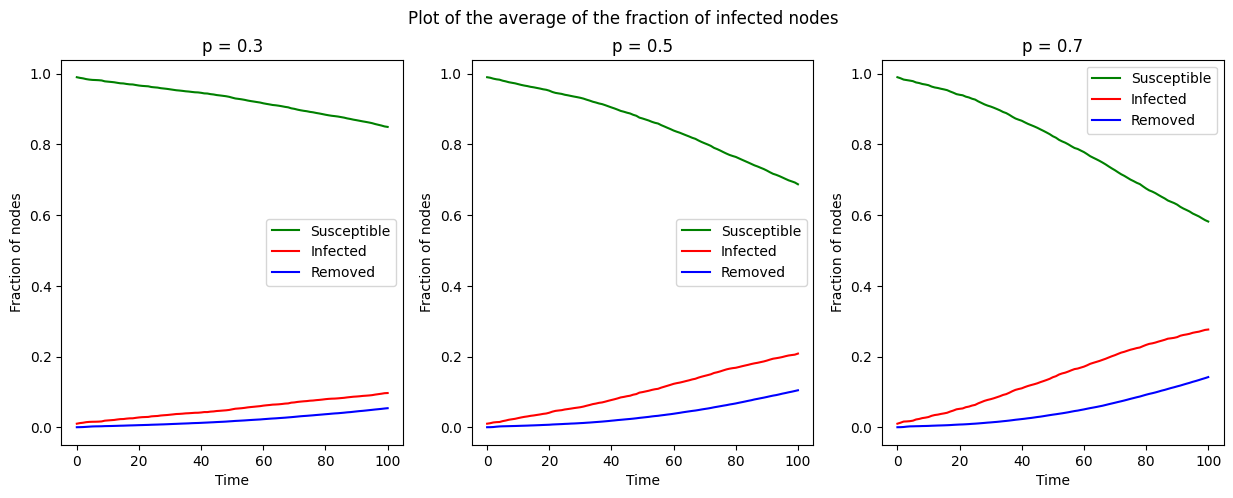

In [300]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

frac_time = fraction_time_new(G_ba, q, N)
plot_frac(frac_time, q)

Epidemics started, but did not finish.

The best case for random graph. 

## c. Compare with ODE model

It's hard to compare, because for simulation on networks epidemics do not finish. But tendency is similar.

## d, e. Simulation with 20 different value of p. Conclusion

Now select at least 20 different values of p. Simulate the SIR dynamics on the network starting with a random node. Measure the total propotion of the network that becomes infected, the time to clear infection and the time to the largest number of infected nodes. For each measure plot it as a function of p. Make one plot for each measure, including a separate line (labeled appropriately) for each network.

In [301]:
numb = 25
step = 1 / (numb - 1)
p_min = 0
p_max = 1 + step/10
q = np.arange(p_min, p_max, step)

N = 500

### The total propotion of the network that becomes infected

In [302]:
def total_prop_inf_new(G, p, N):
    """
    Calculate the total propotion of the network that becomes infected
    
    def total_prop_inf_new(G: nx.Graph, p: float, N: int) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    N: int
        The number of Monte Carlo simulations 
    """
    all_prop = []
    for q in p:
        prop = 0
        for i in range(N):
            res = sir_netw_new(G, q)
            infected = np.array(res)[:,1]
            prop += np.sum(infected) / len(G.nodes)
        prop /= N
        all_prop.append(prop)
    return all_prop

In [303]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

tpi_2d_lat = total_prop_inf_new(G_2d_lat, q, N)

In [304]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

tpi_rand = total_prop_inf_new(G_rand, q, N)

In [305]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

tpi_ws = total_prop_inf_new(G_ws, q, N)

In [306]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

tpi_ba = total_prop_inf_new(G_ba, q, N)

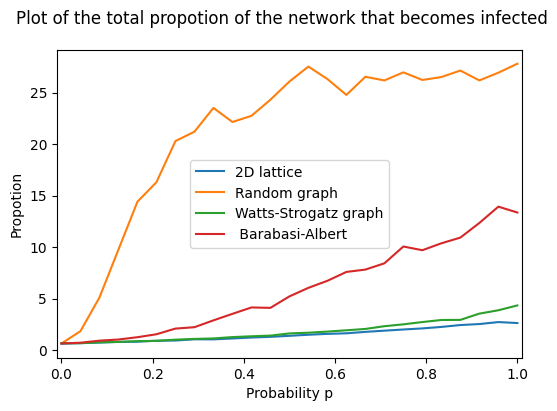

In [307]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle("Plot of the total propotion of the network that becomes infected")
ax.plot(q, tpi_2d_lat, label = "2D lattice")
ax.plot(q, tpi_rand, label = "Random graph")
ax.plot(q, tpi_ws, label = "Watts-Strogatz graph")
ax.plot(q, tpi_ba, label = " Barabasi-Albert")
ax.set(xlabel = 'Probability p', ylabel = 'Propotion')
ax.set_xlim(-0.01, 1.01)
plt.legend()
plt.show()

The fastest for random graph. The slowest for 2D lattice graph.

###  The time to clear infection

In [308]:
def time_clear_new(G, p, N):
    """
    Calculate the time to clear infection
    
    def time_clear_new(G: nx.Graph, p: float, N: int) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    N: int
        The number of Monte Carlo simulations 
    """
    all_time = []
    for q in p:
        time = 0
        for i in range(N):
            res = sir_netw_new(G, q)
            time += len(res)
        time /= N
        all_time.append(time)
    return all_time

In [310]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

tc_2d_lat = time_clear_new(G_2d_lat, q, N)

In [311]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

tc_rand = time_clear_new(G_rand, q, N)

In [312]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

tc_ws = time_clear_new(G_ws, q, N)

In [313]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

tc_ba = time_clear_new(G_ba, q, N)

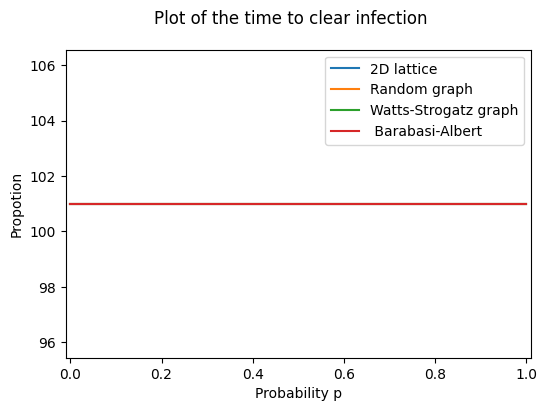

In [314]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle("Plot of the time to clear infection")
ax.plot(q, tc_2d_lat, label = "2D lattice")
ax.plot(q, tc_rand, label = "Random graph")
ax.plot(q, tc_ws, label = "Watts-Strogatz graph")
ax.plot(q, tc_ba, label = " Barabasi-Albert")
ax.set(xlabel = 'Probability p', ylabel = 'Propotion')
ax.set_xlim(-0.01, 1.01)
plt.legend()
plt.show()

Infection does not clear. 

### The time to the largest number of infected nodes

In [315]:
def time_largest_new(G, p, N):
    """
    Calculate the time to the largest number of infected nodes
    
    def time_clear_new(G: nx.Graph, p: float, N: int) -> list
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    p: float
        The probability of contagion
    N: int
        The number of Monte Carlo simulations 
    """
    all_time = []
    for q in p:
        time = 0
        for i in range(N):
            res = sir_netw_new(G, q)
            inf = np.array(res)[:,1]
            time += np.argmax(inf)
        time /= N
        all_time.append(time)
    return all_time

In [316]:
a = 10
b = 10
G_2d_lat = nx.grid_2d_graph(a, b)

tl_2d_lat = time_largest_new(G_2d_lat, q, N)

In [317]:
numb_nodes = 100
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

tl_rand = time_largest_new(G_rand, q, N)

In [318]:
numb_nodes = 100
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

tl_ws = time_largest_new(G_ws, q, N)

In [319]:
numb_nodes = 100
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

tl_ba = time_largest_new(G_ba, q, N)

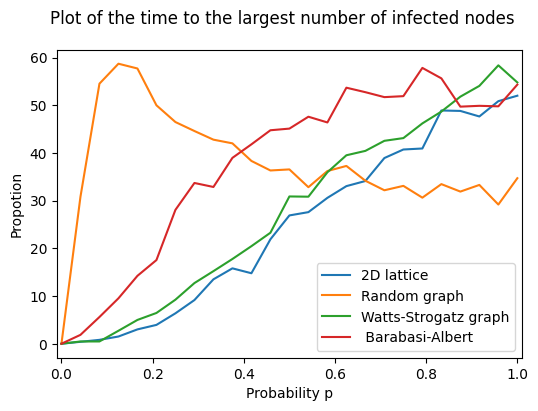

In [320]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle("Plot of the time to the largest number of infected nodes")
ax.plot(q, tl_2d_lat, label = "2D lattice")
ax.plot(q, tl_rand, label = "Random graph")
ax.plot(q, tl_ws, label = "Watts-Strogatz graph")
ax.plot(q, tl_ba, label = "Barabasi-Albert")
ax.set(xlabel = 'Probability p', ylabel = 'Propotion')
ax.set_xlim(-0.01, 1.01)
plt.legend()
plt.show()

For small $p$ the fastest for random graph, then for the Barabasi-Albert. At the begining the slowest for 2D lattice graph, then for random graph. 

## f. Visualizing a single run of the infection spreading

In [323]:
def create_gif_new(G, result, name):
    """
    Visualize a single run of the infection spreading in form of an animated gif
    
    def create_gif(G: nx.Graph, result: list, name: str)
        
    Parameters
    ----------
    G: nx.Graph
        Graph on which simulate SIR model
    result: list
        The result of simulation of SIR model
    name: str
        The name of the graph on which simulate SIR model
    """
    frames = []
    n = len(result)

    for i in range(n):
        color_map = []
        nodes = result[i][-1]
        for j in nodes:
            if nodes[j]["state"] == "S":
                color_map.append('green')
            elif nodes[j]["state"] == "I":
                color_map.append('red')
            else:
                color_map.append('blue')

        plt.figure(figsize = (8, 8))
        if name == "2d_lat_new":
            nx.draw_spectral(G, with_labels = True, node_color = color_map)
        else:
            nx.draw_kamada_kawai(G, with_labels = True, node_color = color_map)
        plt.savefig(f'{name}_{i}.png')
        frames.append(Image.open(f'{name}_{i}.png'))
        plt.close()

    frames.append(Image.open(f'{name}_{n-1}.png'))
    frames.append(Image.open(f'{name}_{n-1}.png'))

    frames[0].save(f"{name}.gif", format = "GIF", append_images = frames[1:], optimize = True, save_all = True, duration = n*90, loop = 0)


### 2D lattice graph

In [329]:
a = 5
b = 6
G_2d_lat = nx.grid_2d_graph(a, b)

q = 0.7
result_2d_lat = sir_netw_new(G_2d_lat, q, with_nodes = True)

create_gif_new(G_2d_lat, result_2d_lat, "2d_lat_new")

<img src="2d_lat_new.gif" width="500" align="center">

### Random graph

In [330]:
numb_nodes = 30
p = 0.5
G_rand = nx.erdos_renyi_graph(numb_nodes, p)

q = 0.7
result_rand = sir_netw_new(G_rand, q, with_nodes = True)

create_gif_new(G_rand, result_rand, "rand_new")

<img src="rand_new.gif" width="500" align="center">

### Watts–Strogatz graph

In [331]:
numb_nodes = 30
k = 4
p = 0.7
G_ws = nx.watts_strogatz_graph(numb_nodes, k, p)

q = 0.7
result_ws = sir_netw_new(G_ws, q, with_nodes = True)

create_gif_new(G_ws, result_ws, "ws_new_new")

<img src="ws_new.gif" width="500" align="center">

### Barabási–Albert graph

In [332]:
numb_nodes = 30
m = 4
G_ba = nx.barabasi_albert_graph(numb_nodes, m)

q = 0.7
result_ba = sir_netw_new(G_ba, q, with_nodes = True)

create_gif_new(G_ba, result_ba, "ba_new")

<img src="ba_new.gif" width="500" align="center">